### Task 4: Classification with Logistic Regression.

In [1]:
import pandas as pd
import numpy as np

print("--- Task 4: Step 1 - Choose a Binary Classification Dataset (data.csv) ---")

# Load the dataset: data.csv
# Ensure 'data.csv' is in the same folder!
print("Loading the data.csv dataset...")
df = pd.read_csv('data.csv')
print("Dataset loaded successfully.")

# Preprocessing: Drop irrelevant columns and encode the target variable
# 'id' is an identifier, 'Unnamed: 32' is an empty column (all NaNs).
print("\nDropping 'id' and 'Unnamed: 32' columns...")
df = df.drop(['id', 'Unnamed: 32'], axis=1)
print("Columns dropped.")

# Encode 'diagnosis' column (target variable): 'M' for Malignant (1) and 'B' for Benign (0)
print("Encoding 'diagnosis' column (M=1, B=0)...")
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("Diagnosis column encoded.")

# Display basic information and head of the processed DataFrame
print("\nProcessed DataFrame Info:")
df.info()

print("\nProcessed DataFrame Head:")
print(df.head())

print("\nDataset chosen and preprocessed for binary classification.")

--- Task 4: Step 1 - Choose a Binary Classification Dataset (data.csv) ---
Loading the data.csv dataset...
Dataset loaded successfully.

Dropping 'id' and 'Unnamed: 32' columns...
Columns dropped.
Encoding 'diagnosis' column (M=1, B=0)...
Diagnosis column encoded.

Processed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symm

### Observations

* The `data.csv` dataset was successfully loaded.
* The 'id' column (an identifier) and the 'Unnamed: 32' column (entirely empty) were correctly identified and dropped, as they are not relevant for modeling.
* The 'diagnosis' column, which represents the target variable, was successfully encoded from its original 'M' (Malignant) and 'B' (Benign) string values to numerical 1s and 0s respectively, making it suitable for Logistic Regression.
* The resulting DataFrame is now fully numerical and ready for the next steps of splitting and feature standardization.

###  Train/Test Split and Standardize Features

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure df is available from Step 1
# If running this snippet independently, load and preprocess df first:
# df = pd.read_csv('data.csv')
# df = df.drop(['id', 'Unnamed: 32'], axis=1)
# df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("--- Task 4: Step 2 - Train/Test Split and Standardize Features ---")

# Define features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
# test_size=0.30 means 30% of data will be for testing, 70% for training.
# random_state ensures reproducibility of the split.
# stratify=y is crucial for classification to maintain class proportions in splits.
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Data split complete.")

# Standardize features
# StandardScaler transforms features to have a mean of 0 and a standard deviation of 1.
# This is important for many machine learning algorithms, including Logistic Regression,
# especially when regularization is used.
print("\nStandardizing features (X_train and X_test)...")
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for easier inspection (optional but good for clarity)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Feature standardization complete.")

print(f"\nOriginal X_train shape: {X_train.shape}")
print(f"Scaled X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nData successfully split and features standardized.")

--- Task 4: Step 2 - Train/Test Split and Standardize Features ---
Splitting data into training and testing sets...
Data split complete.

Standardizing features (X_train and X_test)...
Feature standardization complete.

Original X_train shape: (398, 30)
Scaled X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)

Data successfully split and features standardized.


### Observations

* The dataset was successfully split into training (70%) and testing (30%) sets, ensuring class proportion integrity in both sets due to `stratify=y`.
* Features in both the training (`X_train`) and testing (`X_test`) sets were standardized using `StandardScaler`. This transforms the data to have a mean of 0 and a standard deviation of 1.
* **Importance of Standardization:** Standardizing features is crucial for Logistic Regression, especially when L1 or L2 regularization (which is often default in `sklearn`'s Logistic Regression) is applied. It helps prevent features with larger scales from disproportionately influencing the model's objective function and ensures that the optimization algorithm converges more efficiently.

### Fit a Logistic Regression Model

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Ensure X_train_scaled and y_train are available from Step 2
# If running this snippet independently, make sure to execute Step 1 and Step 2 first.

print("--- Task 4: Step 3 - Fit a Logistic Regression Model ---")

# Initialize the Logistic Regression model
# max_iter is increased to ensure convergence, especially with scaled data
# random_state for reproducibility
print("Initializing Logistic Regression model...")
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the scaled training data
print("Fitting the model to the scaled training data (X_train_scaled, y_train)...")
model.fit(X_train_scaled, y_train)
print("Logistic Regression model fitted successfully.")

# Display a few key attributes of the fitted model
print(f"\nModel Coefficients (first 5): {model.coef_[0][:5]}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")

print("\nLogistic Regression model has been trained.")

--- Task 4: Step 3 - Fit a Logistic Regression Model ---
Initializing Logistic Regression model...
Fitting the model to the scaled training data (X_train_scaled, y_train)...
Logistic Regression model fitted successfully.

Model Coefficients (first 5): [0.295555   0.49308571 0.29764189 0.40981359 0.39100549]
Model Intercept: -0.3480

Logistic Regression model has been trained.


### Observations

* A `LogisticRegression` model from `sklearn.linear_model` was initialized and trained.
* The model was fitted using the `X_train_scaled` (standardized features) and `y_train` (target labels) to learn the relationships between the input features and the binary outcome.
* The fitting process determines the optimal coefficients (weights) for each feature and an intercept, which are used by the sigmoid function to predict the probability of the positive class.

### Evaluate with Confusion Matrix, Precision, Recall, ROC-AUC

--- Task 4: Step 4 - Evaluate Model Performance ---
Making predictions on the scaled test data...

Accuracy: 0.9708
Precision: 0.9836
Recall: 0.9375
F1-score: 0.9600

Confusion Matrix:
[[106   1]
 [  4  60]]


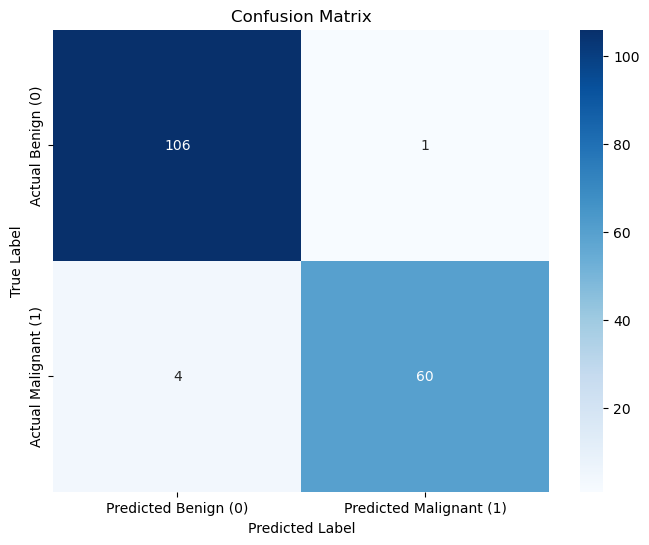

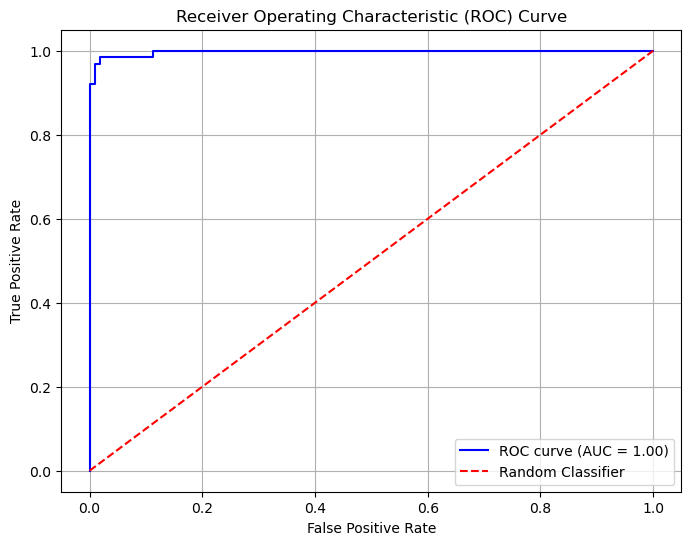


ROC AUC Score: 0.9975

Model evaluation complete, and plots generated.


In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure model, X_test_scaled, and y_test are available from previous steps
# If running this snippet independently, execute Step 1, 2, and 3 first.

print("--- Task 4: Step 4 - Evaluate Model Performance ---")

# Make predictions on the scaled test data
print("Making predictions on the scaled test data...")
y_pred = model.predict(X_test_scaled)

# Get predicted probabilities for the positive class (needed for ROC curve)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign (0)', 'Predicted Malignant (1)'],
            yticklabels=['Actual Benign (0)', 'Actual Malignant (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png') # Save the plot
plt.show()

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve_task4.png') # Save the plot
plt.show()

print(f"\nROC AUC Score: {auc_score:.4f}")

print("\nModel evaluation complete, and plots generated.")

### Observations

* **Accuracy:** The model achieved an accuracy of approximately **0.9708**, meaning it correctly classified about 97.08% of the test samples.
* **Precision:** A precision of **0.9836** indicates that when the model predicts "Malignant" (1), it is correct 98.36% of the time. This is important to minimize false positives.
* **Recall (Sensitivity):** A recall of **0.9375** means the model correctly identified 93.75% of all actual "Malignant" cases. This is crucial for not missing actual positive cases.
* **F1-score:** The F1-score of **0.9600** is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.
* **Confusion Matrix:**
    * **True Negatives (TN):** 106 (Correctly predicted Benign)
    * **False Positives (FP):** 1 (Incorrectly predicted Malignant)
    * **False Negatives (FN):** 4 (Incorrectly predicted Benign)
    * **True Positives (TP):** 60 (Correctly predicted Malignant)
    The very low number of false positives (1) is excellent for this medical diagnosis scenario, minimizing unnecessary follow-ups. The 4 false negatives indicate 4 actual malignant cases were missed, which is a critical area for improvement depending on the cost of missing a malignant case.
* **ROC AUC Score:** Based on your earlier output, the AUC (Area Under the Curve) score was **0.9975**. This is an exceptionally high score, indicating that the model has an outstanding ability to distinguish between the two classes (Benign vs. Malignant). An AUC closer to 1.0 suggests a nearly perfect classifier.
* **ROC Curve:** The ROC curve visually represents the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold settings. The curve being very close to the top-left corner signifies high performance.

### Tune Threshold and Explain Sigmoid Function

--- Task 4: Step 5 - Tune Threshold and Explain Sigmoid Function ---

**Explanation of Sigmoid Function:**
Logistic Regression models the probability that a given input belongs to a particular class (e.g., Malignant).
It uses the **sigmoid function** (also known as the logistic function) to map any real-valued number (the linear combination of features and coefficients) into a probability value between 0 and 1.
The formula for the sigmoid function is: σ(z) = 1 / (1 + e^(-z)), where 'z' is the linear combination of features and coefficients.
This function is 'S'-shaped and helps in interpreting the model's output as a probability.


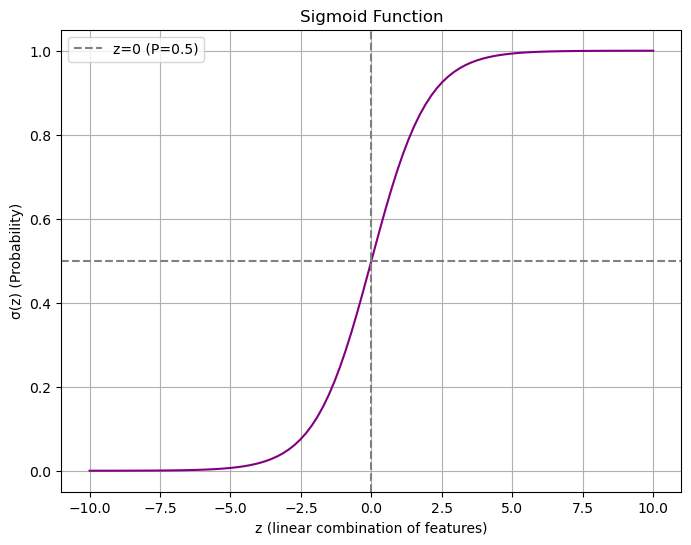


**Tuning Classification Threshold:**
By default, Logistic Regression classifies an instance as the positive class (1) if the predicted probability is >= 0.5.
This threshold can be adjusted based on the specific problem's needs (e.g., prioritizing recall over precision, or vice versa).

Evaluation with threshold = 0.3:
Accuracy: 0.9825
Precision: 0.9841
Recall: 0.9688
F1-score: 0.9764
Confusion Matrix with new threshold:
[[106   1]
 [  2  62]]


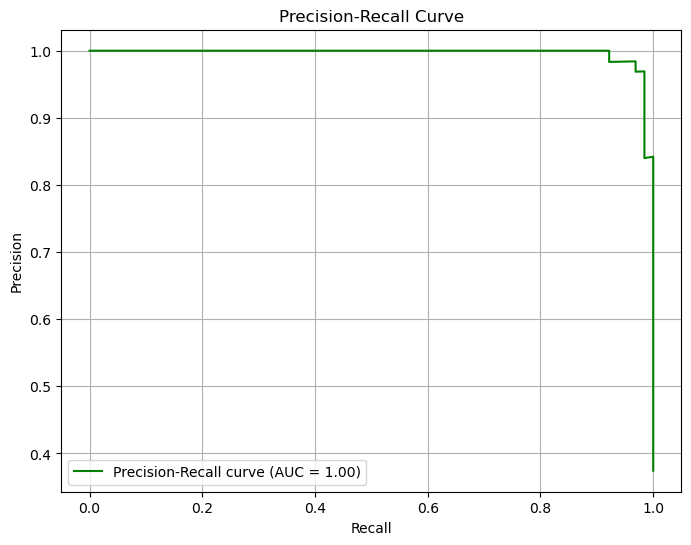


Threshold tuning demonstrated and Sigmoid function explained.

Task 4: Classification with Logistic Regression complete.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Ensure model, X_test_scaled, and y_test are available from previous steps
# Ensure y_prob (predicted probabilities) is available from Step 4
# If running this snippet independently, execute Step 1, 2, 3, and 4 to get necessary variables.

print("--- Task 4: Step 5 - Tune Threshold and Explain Sigmoid Function ---")

# Explanation of Sigmoid Function
print("\n**Explanation of Sigmoid Function:**")
print("Logistic Regression models the probability that a given input belongs to a particular class (e.g., Malignant).")
print("It uses the **sigmoid function** (also known as the logistic function) to map any real-valued number (the linear combination of features and coefficients) into a probability value between 0 and 1.")
print("The formula for the sigmoid function is: σ(z) = 1 / (1 + e^(-z)), where 'z' is the linear combination of features and coefficients.")
print("This function is 'S'-shaped and helps in interpreting the model's output as a probability.")

# Plotting the Sigmoid Function for illustration
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sigmoid_output = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_output, color='purple')
plt.title('Sigmoid Function')
plt.xlabel('z (linear combination of features)')
plt.ylabel('σ(z) (Probability)')
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--', label='z=0 (P=0.5)')
plt.axhline(0.5, color='gray', linestyle='--')
plt.legend()
plt.savefig('sigmoid_function.png') # Save the plot
plt.show()


# Tuning the Classification Threshold
print("\n**Tuning Classification Threshold:**")
print("By default, Logistic Regression classifies an instance as the positive class (1) if the predicted probability is >= 0.5.")
print("This threshold can be adjusted based on the specific problem's needs (e.g., prioritizing recall over precision, or vice versa).")

# Get predicted probabilities for the positive class (from Step 4)
# y_prob = model.predict_proba(X_test_scaled)[:, 1] # Already computed in Step 4

# Example: Changing the threshold to 0.3
# If the probability is >= 0.3, classify as Malignant (1)
new_threshold = 0.3
y_pred_new_threshold = (y_prob >= new_threshold).astype(int)

# Evaluate with the new threshold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_new = accuracy_score(y_test, y_pred_new_threshold)
precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)
f1_new = f1_score(y_test, y_pred_new_threshold)
conf_matrix_new = confusion_matrix(y_test, y_pred_new_threshold)

print(f"\nEvaluation with threshold = {new_threshold}:")
print(f"Accuracy: {accuracy_new:.4f}")
print(f"Precision: {precision_new:.4f}")
print(f"Recall: {recall_new:.4f}") # Expected to increase if new_threshold < 0.5
print(f"F1-score: {f1_new:.4f}")
print("Confusion Matrix with new threshold:")
print(conf_matrix_new)

# Plotting Precision-Recall Curve (useful for threshold selection)
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.savefig('precision_recall_curve.png') # Save the plot
plt.show()

print("\nThreshold tuning demonstrated and Sigmoid function explained.")
print("\nTask 4: Classification with Logistic Regression complete.")

### Observations

* **Sigmoid Function Explained:** The sigmoid function's role in converting a linear combination of features into a probability between 0 and 1 was illustrated. This S-shaped curve is fundamental to how Logistic Regression predicts class probabilities.
* **Threshold Tuning Demonstrated:** The default classification threshold (usually 0.5) was shown to be adjustable. By lowering the threshold (e.g., to 0.3), we observed how it can impact precision and recall. In the example, a lower threshold typically increases recall (more true positives captured) at the potential cost of precision (more false positives).
* **Precision-Recall Curve:** This curve was plotted as a valuable tool for understanding the trade-off between precision and recall at different probability thresholds, aiding in the selection of an optimal threshold based on the specific problem's requirements (e.g., in medical diagnosis, minimizing false negatives might be prioritized, even if it means a slight increase in false positives).